## Data Science Job Salaries

### Overview

Data Science jobs have surged in demand over recent years, making them among the most sought-after positions in the technology sector. Infact in 2012, an article in the Harvard Business Review by Thomas H. Davenport and D.J. Patil called Data Scientist as **The Sexiest Job of the 21st Century**. Since then, Data Scientist roles have increased by 650 percent, and this rise shows no sign of stopping.

Data Scientist salaries have also risen with demand; Data Scientists can typically expect to make six figures. Demand also translates into an ability to relocate far more easily—from city to city, and even internationally.

### Dataset
The dataset in study has been among the most recent datasets posted on Kaggle.com 
You can find it [here](https://www.kaggle.com/datasets/whenamancodes/data-professionals-salary-dataset-2022)

### Feature Description

* work_year - The year the salary was paid
* job_title - The role worked in during the year
* job_category - The division of work of the employee.
* salary_currency - The currency of the salary paid as an ISO 4217 currency code.
* salary - The total gross salary amount paid.
* salary_in_usd - The salary in USD
* employee_residence - Employee's primary country of residence in during the work year as an ISO 3166 country code
* experience_level - The experience level in the job during the year with the following possible values:
    * Entry-level
    * Mid-level 
    * Senior-level
    * Executive-level
* employment_type - The type of employement for the role:
    * Part-time
    * Full-time
    * Contract
    * Freelance
* work_setting - The work setting for the role for the role:
    * In-Person
    * Hybrid
    * Remote
* company_location - The country of the employer's main office or contracting branch as an ISO 3166 country code
* company_size - The average number of people that worked for the company during the year:
    * S Small
    * M Medium
    * L Large
    
### Objectives of the notebook:
1. Univariate Analysis - Explore every feature in the dataset
2. Work Year Analysis(with Salary, Remote Ratio)
3. Experience Level Analysis (with Employment Type, Top 3 Job Title, Company Size)
4. Company Location Analysis (with Experience Level)
5. Salary Analysis (with Work Year, Experience Level, Company Size, Job Title, Remote Ratio)

In [1]:
# import libraries for Data manipulation and visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Data Inspection and Cleaning

In [3]:
# import Dataset

ds_salaries = pd.read_csv("jobs_in_data.csv")
ds_salaries.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


In [4]:
# Check shape

ds_salaries.shape

(9355, 12)

In [5]:
ds_salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


In [6]:
# Check for missing values

ds_salaries.isna().sum()

work_year             0
job_title             0
job_category          0
salary_currency       0
salary                0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64

In [7]:
ds_salaries.describe()

,work_year,salary,salary_in_usd
count,9355.000000,9355.000000,9355.000000
mean,2022.760449,149927.981293,150299.495564
std,0.519470,63608.835387,63177.372024
min,2020.000000,14000.000000,15000.000000
25%,2023.000000,105200.000000,105700.000000
50%,2023.000000,143860.000000,143000.000000
75%,2023.000000,187000.000000,186723.000000
max,2023.000000,450000.000000,450000.000000


In [8]:
ds_salaries.describe(include='object')

,job_title,job_category,salary_currency,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
count,9355,9355,9355,9355,9355,9355,9355,9355,9355
unique,125,10,11,83,4,4,3,70,3
top,Data Engineer,Data Science and Research,USD,United States,Senior,Full-time,In-person,United States,M
freq,2195,3014,8591,8086,6709,9310,5730,8132,8448


In [9]:
# Check unique values in categorical variables

categorical = ['experience_level','employment_type','job_title','employee_residence','company_location','company_size']

for i in categorical:
    print('Unique values in ' + i + ' : ' + str(ds_salaries[i].unique()))
    print('\n')

print ('\nNumber of unique values in Categorical variables:\n')
print (ds_salaries[categorical].nunique())

Unique values in experience_level : ['Mid-level' 'Senior' 'Executive' 'Entry-level']


Unique values in employment_type : ['Full-time' 'Part-time' 'Contract' 'Freelance']


Unique values in job_title : ['Data DevOps Engineer' 'Data Architect' 'Data Scientist'
 'Machine Learning Researcher' 'Data Engineer' 'Machine Learning Engineer'
 'Data Analyst' 'Analytics Engineer' 'Applied Scientist' 'BI Developer'
 'Business Intelligence Engineer' 'Research Scientist' 'Research Analyst'
 'Research Engineer' 'Data Science Engineer' 'Data Quality Analyst'
 'Data Product Manager' 'Machine Learning Scientist' 'AI Engineer'
 'MLOps Engineer' 'Deep Learning Engineer' 'Data Modeler'
 'Data Product Owner' 'Data Science Consultant'
 'Business Intelligence Analyst' 'AI Developer' 'Data Manager'
 'ML Engineer' 'Data Science Director' 'Head of Data' 'BI Analyst'
 'Data Management Analyst' 'Machine Learning Modeler' 'Data Specialist'
 'BI Data Analyst' 'Data Integration Engineer'
 'Business Intelligence Manag

<Axes: >

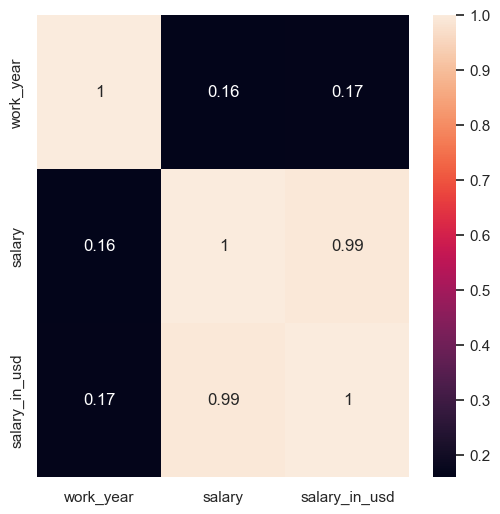

In [10]:
#Visualize Correlations in a heatmap

plt.figure(figsize=(6,6))
sns.heatmap(ds_salaries.corr(numeric_only=True), annot=True)

### Summary 
* The Dataset contains 9355 records and 12 features.
* There are no missing values in the dataset.
* Data contains values from 2020 to 2023 work year.
* There are 4 unique experience levels with Senior/Executive occuring 6709 times.
* The Dataset contains 4 employment types; Full time employment is the most common type occurring 9310 instances).
* There are 125 unique job titles.
* Salary is recorded in 11 different currencies.
* The average salary in USD is 150299.49
* Employees are resident in 83 locations while the Companies are located in 70 locations.
* The US contains the most Data Science professionals and companies with 8086 professionals and 8132 companies resident in the US.

## 1. Univariate Analysis
### 1.1. Categorical variables
### 1.1.1. Experience Level

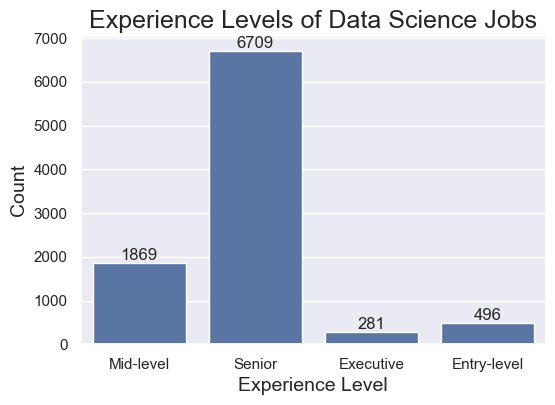

In [11]:
plt.figure(figsize=(6,4))
plt.title('Experience Levels of Data Science Jobs', fontsize=18)
ax = sns.countplot (x='experience_level', data=ds_salaries)
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel('Experience Level', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

In [12]:
experience_ratio = ds_salaries.experience_level.value_counts(normalize=True)
display(experience_ratio)

experience_level
Senior         0.717157
Mid-level      0.199786
Entry-level    0.053020
Executive      0.030037
Name: proportion, dtype: float64

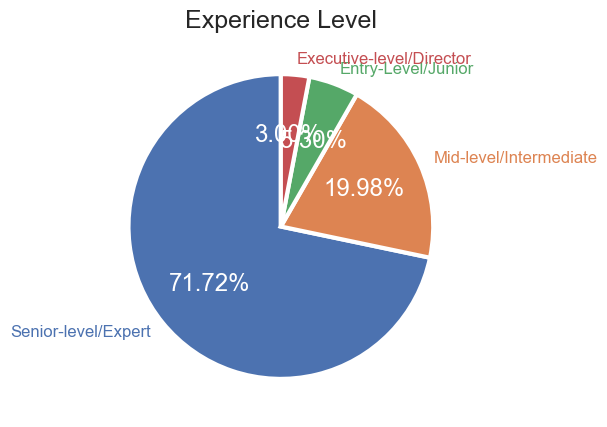

In [13]:
fig, ax = plt.subplots(figsize=(6, 6))
x=experience_ratio

labels = ['Senior-level/Expert','Mid-level/Intermediate','Entry-Level/Junior','Executive-level/Director']

patches, texts, pcts = ax.pie(
    x, labels=labels, autopct='%.2f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    startangle=90)
# For each wedge, set the corresponding text label color to the wedge's
# face color.
for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=200, fontsize=12)
ax.set_title('Experience Level', fontsize=18)
plt.tight_layout()

***A large percentage of Data Science Professionals occupy Senior-level/Expert as well as Mid-level/Intermediate positions. However, Executive-level/Directors in Data Science are few; accounting for only 3.00% of the dataset.***

### 1.1.2. Job Titles

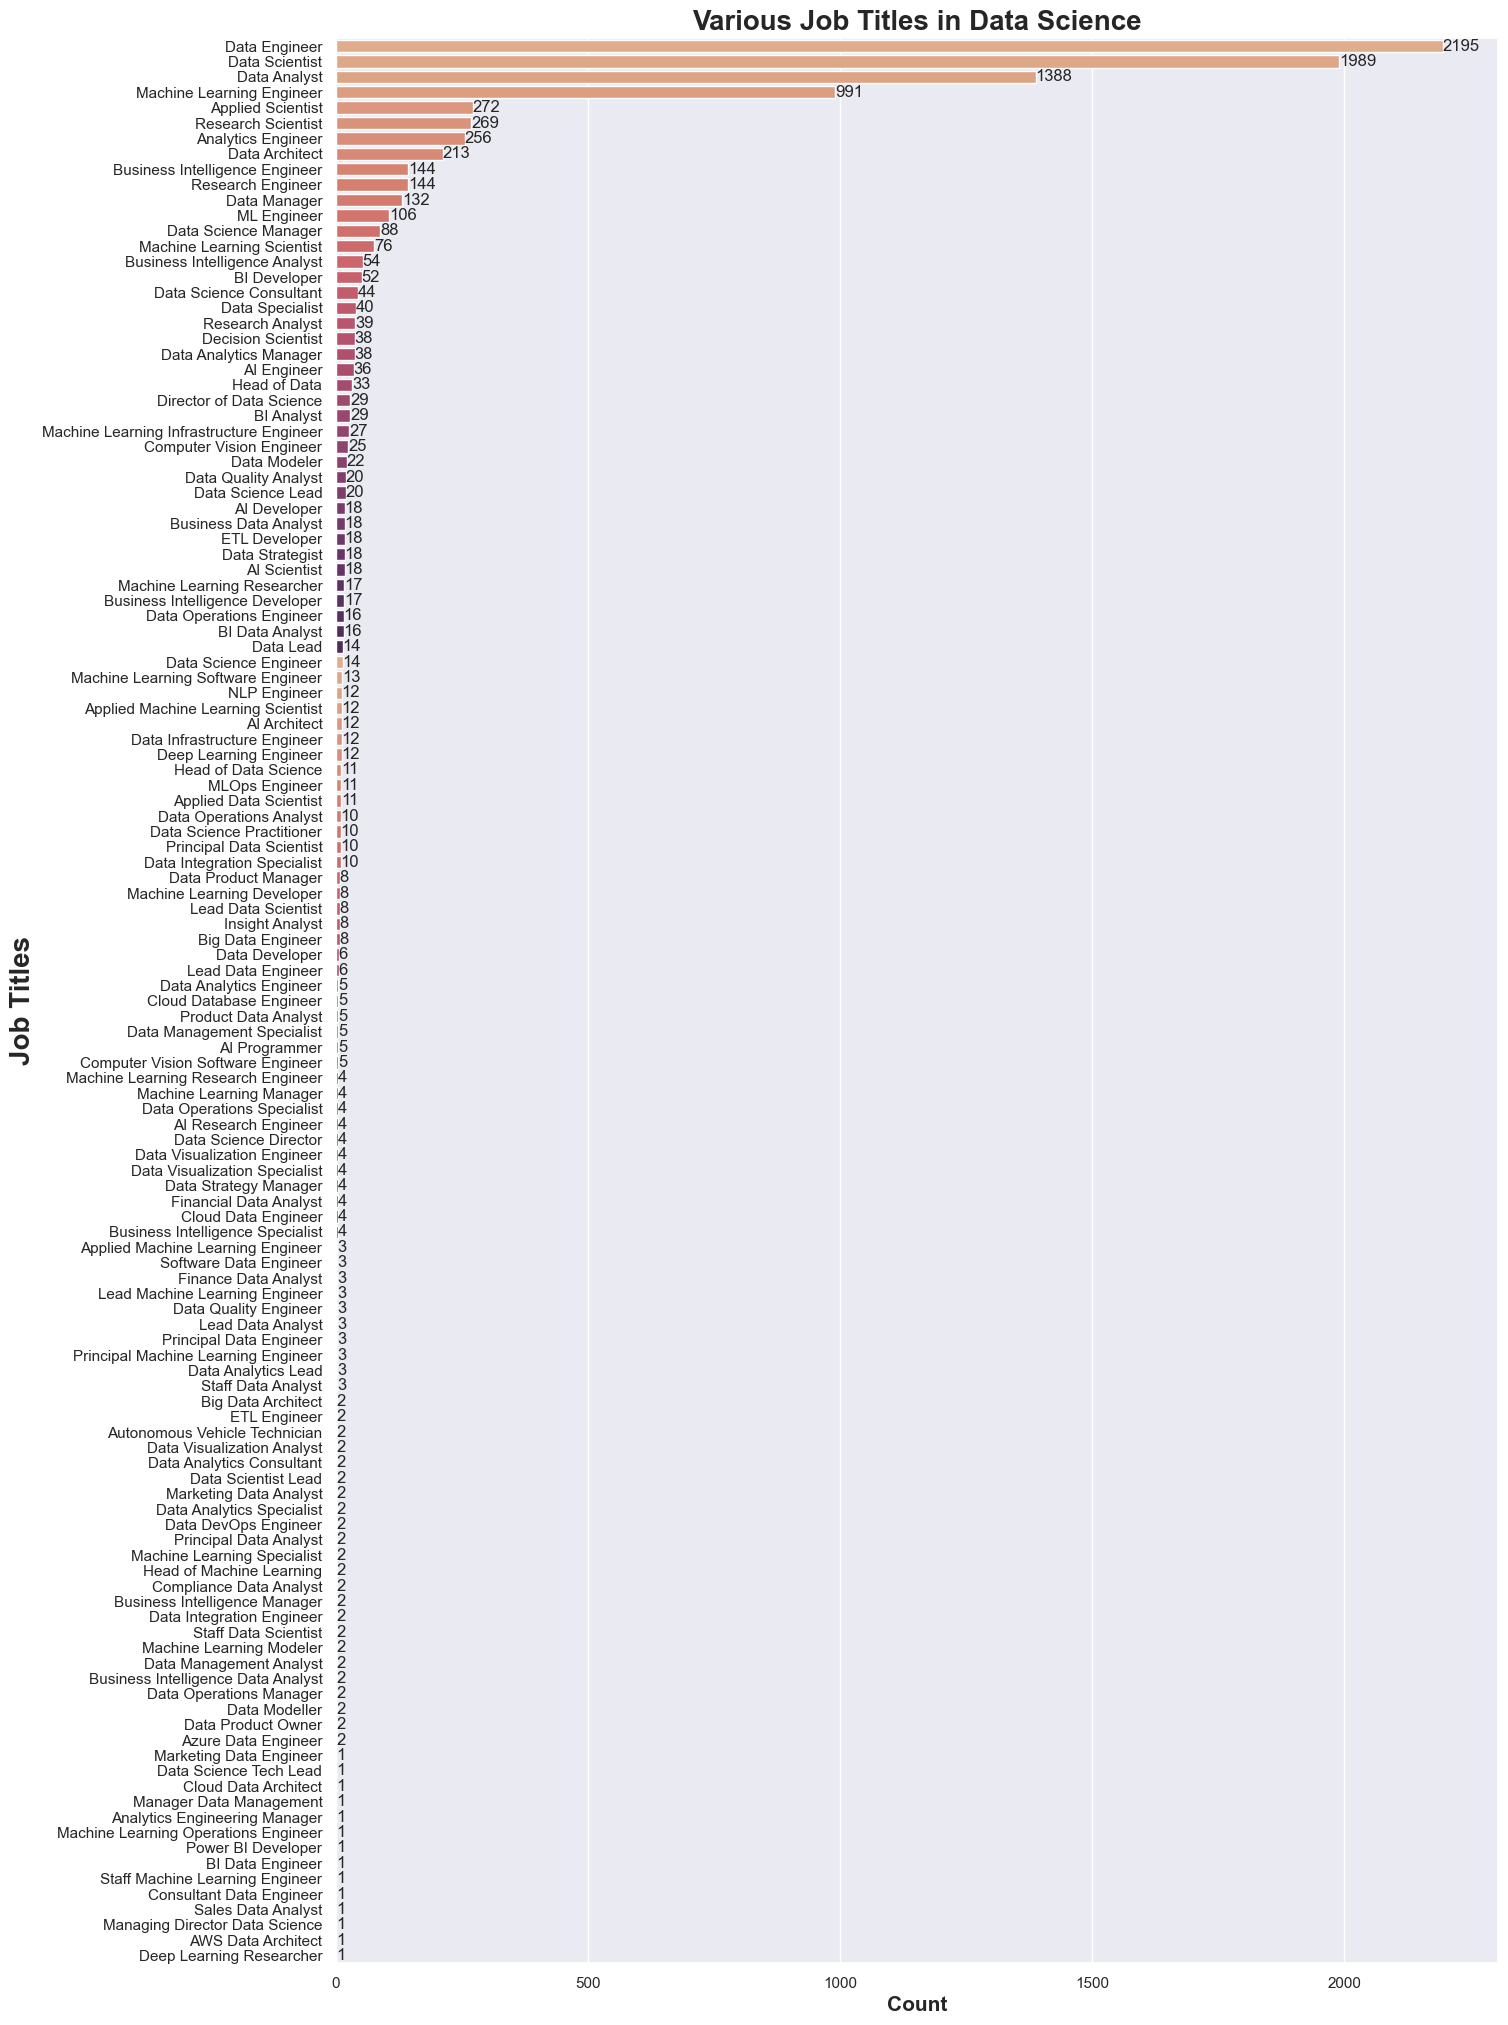

In [14]:
palette = sns.color_palette("flare",40)
sns.set()

plt.figure(figsize=(15,25))
plt.title('Various Job Titles in Data Science', fontsize=20, fontweight='bold')
ax = sns.countplot(y='job_title', data=ds_salaries, order=ds_salaries['job_title'].value_counts().index, palette=palette )
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel('Count', fontsize=15, fontweight='bold')
plt.ylabel('Job Titles', fontsize=20, fontweight='bold')
plt.show()

### 1.1.3 Employment Type

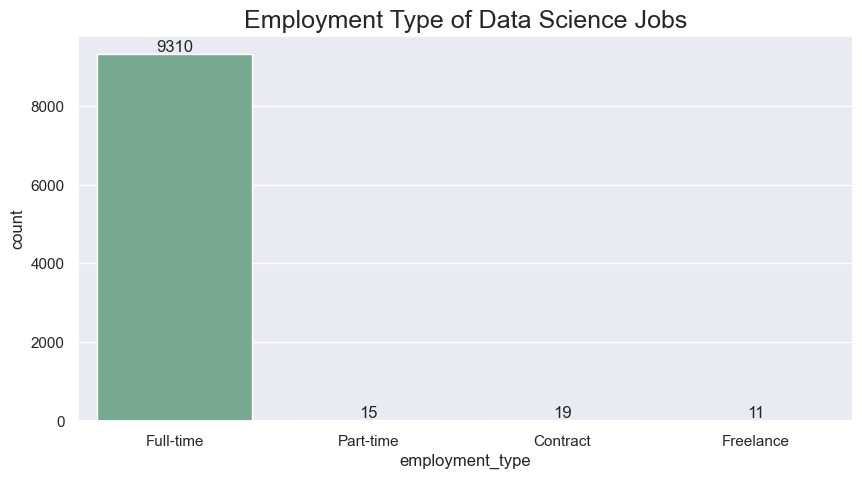

In [15]:
plt.figure(figsize=(10,5))
plt.title('Employment Type of Data Science Jobs', fontsize=18)
ax = sns.countplot (x='employment_type', data=ds_salaries, palette="crest")
for i in ax.containers:
    ax.bar_label(i)
plt.show()

In [16]:
emp_type_ratio = ds_salaries.employment_type.value_counts(normalize=True)
display(emp_type_ratio)

employment_type
Full-time    0.995190
Contract     0.002031
Part-time    0.001603
Freelance    0.001176
Name: proportion, dtype: float64

### 1.1.4. Employee Residence & Company Location

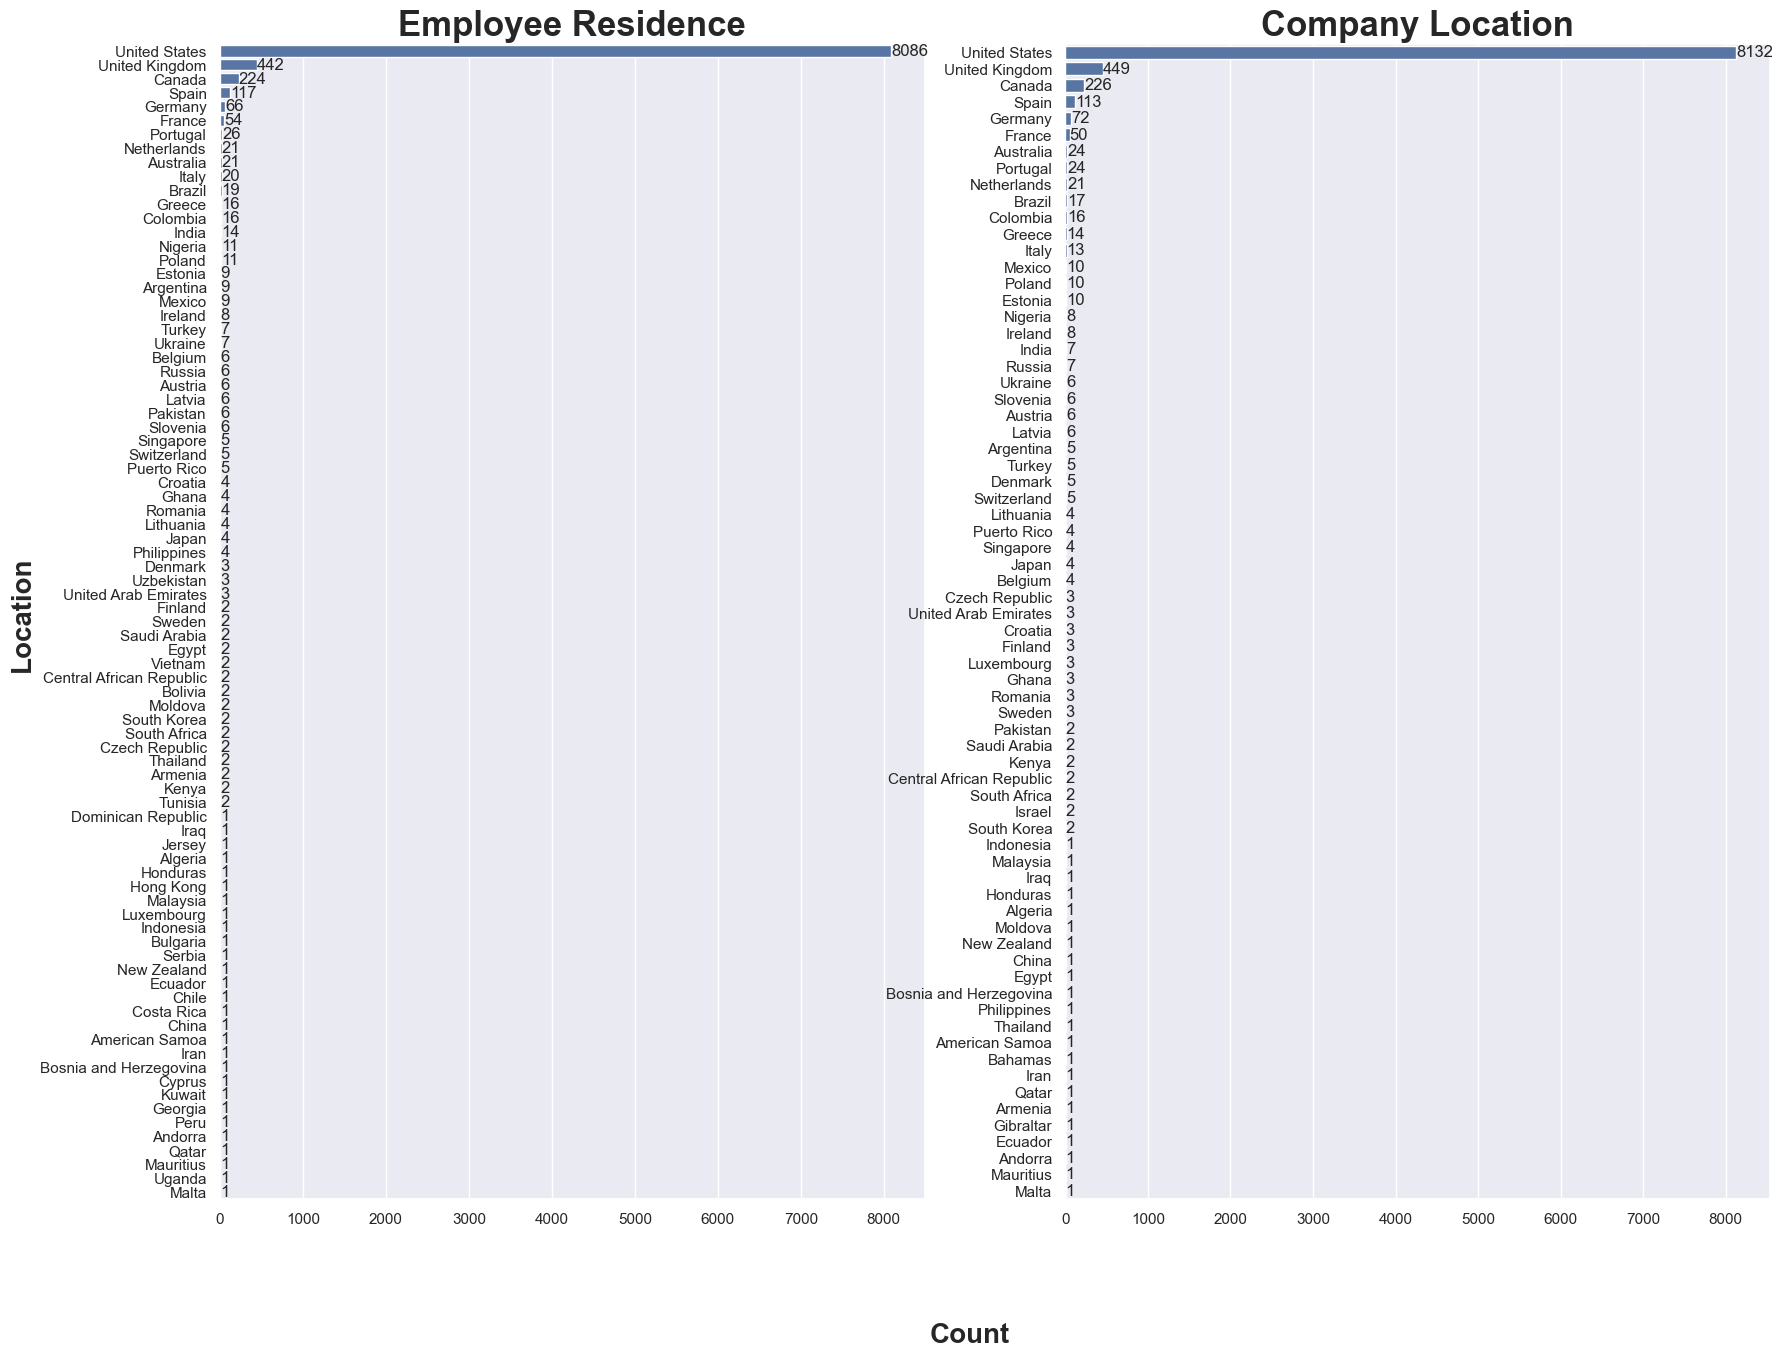

In [17]:
fig,axes=plt.subplots(1,2,figsize=(20,15))
ax1 = sns.countplot(ax=axes[0],y='employee_residence', data=ds_salaries, order=ds_salaries['employee_residence'].value_counts().index)
ax2 = sns.countplot(ax=axes[1],y='company_location', data=ds_salaries,  order=ds_salaries['company_location'].value_counts().index)

for i in ax1.containers:
    ax1.bar_label(i)
    
for i in ax2.containers:
    ax2.bar_label(i)
    
axes[0].set_title('Employee Residence', fontsize=25, fontweight='bold')
axes[0].set(xlabel=None)
axes[0].set(ylabel=None)
axes[1].set_title('Company Location', fontsize=25, fontweight='bold')
axes[1].set(xlabel=None)
axes[1].set(ylabel=None)

fig.supxlabel('Count', fontsize=20, fontweight='bold')
fig.supylabel('Location', fontsize=20, fontweight='bold')

plt.show()

***For Employee Residence and Company location, the US is the highest in terms of frequency, followed by United Kingdom. A total of over 8086 Employees and 8132 Companies are resident in the US while other locations record values below 500 for both Employee residence and company location.***

### 1.1.5. Company Size

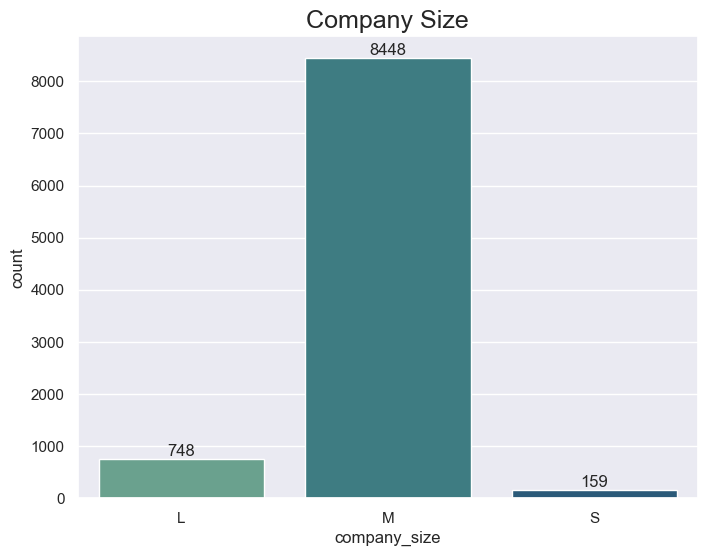

In [18]:
plt.figure(figsize=(8,6))
plt.title('Company Size', fontsize=18)
ax = sns.countplot (x='company_size', data=ds_salaries, palette="crest")
for i in ax.containers:
    ax.bar_label(i)
plt.show()

In [19]:
size_ratio = ds_salaries.company_size.value_counts(normalize=True)
display(size_ratio)

company_size
M    0.903046
L    0.079957
S    0.016996
Name: proportion, dtype: float64

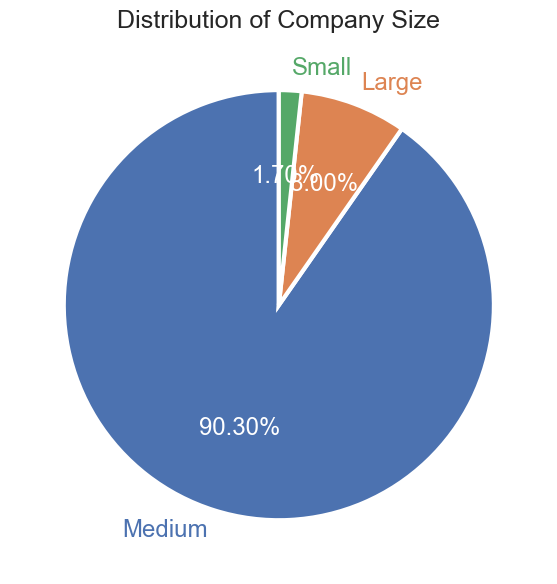

In [20]:
fig, ax = plt.subplots(figsize=(6, 6))
x=size_ratio
labels = ['Medium','Large','Small']

patches, texts, pcts = ax.pie(
    x, labels=labels, autopct='%.2f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    startangle=90)
# For each wedge, set the corresponding text label color to the wedge's
# face color.
for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=200)
ax.set_title('Distribution of Company Size', fontsize=18)
plt.tight_layout()

***Most companies with Data Science Professionals are Medium Sized companies. Small companies have the least number of Data Science jobs.***

### 1.2. Numeric variables

### 1.2.1 Work Year

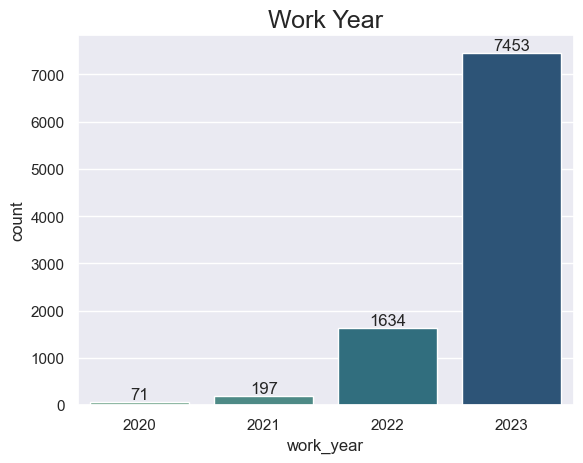

In [21]:
plt.title ('Work Year', fontsize=18)
ax = sns.countplot(x='work_year', data=ds_salaries, palette="crest")
for i in ax.containers:
    ax.bar_label(i)

In [22]:
year_ratio = ds_salaries.work_year.value_counts(normalize=True)
display(year_ratio)

work_year
2023    0.796686
2022    0.174666
2021    0.021058
2020    0.007590
Name: proportion, dtype: float64

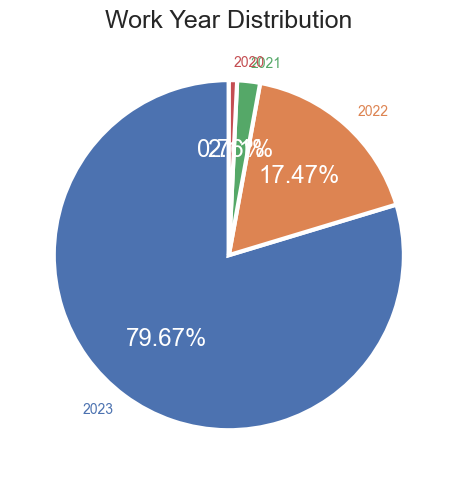

In [23]:
fig, ax = plt.subplots(figsize=(5, 5))
x = year_ratio
labels = ['2023','2022','2021','2020']


patches, texts, pcts = ax.pie(
    x, labels=labels, autopct='%.2f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    startangle=90)
# For each wedge, set the corresponding text label color to the wedge's
# face color.
for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
  texts[i].set_fontsize(10)
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=200)
ax.set_title('Work Year Distribution', fontsize=18)
plt.tight_layout()

***The Dataset contains values from 2020 - 2023 with 2023 records accounting for 79.67% and 2020 being 0.76%***

### 1.2.2. Salary in USD

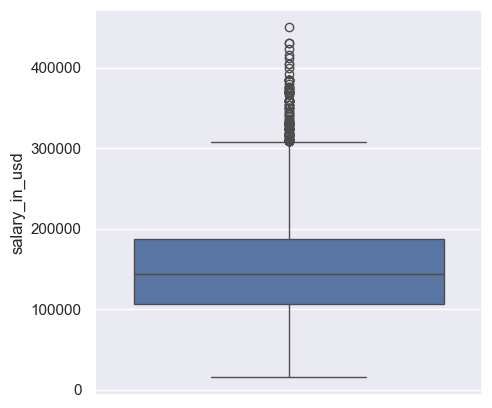

In [24]:
plt.figure(figsize=(5,5))
sns.boxplot(y='salary_in_usd', data=ds_salaries)
plt.show()

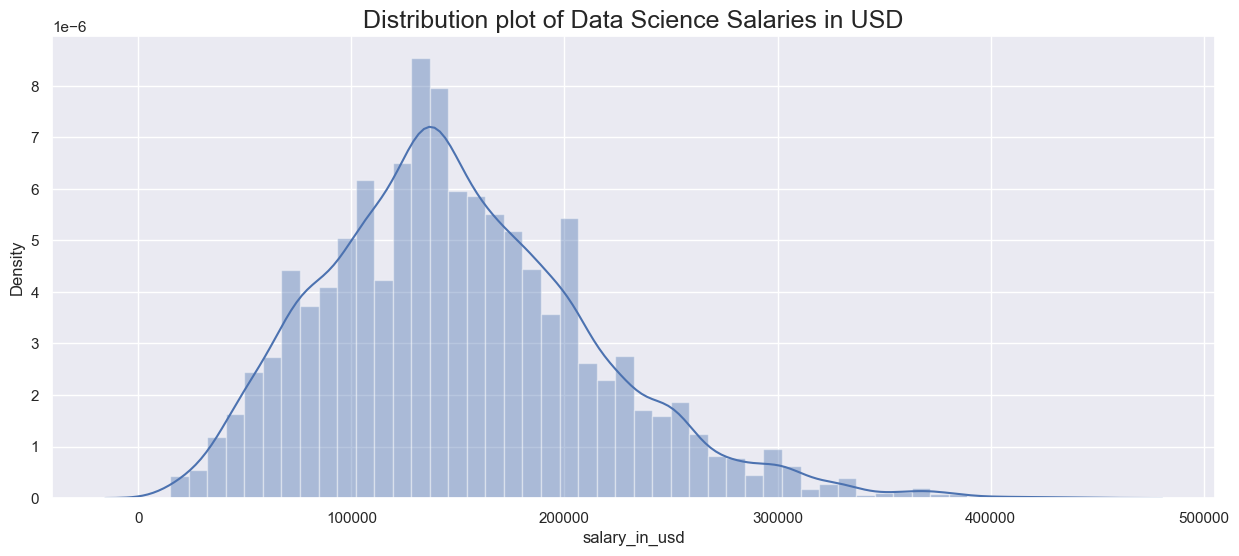

In [25]:
plt.figure(figsize=(15,6))
sns.distplot(ds_salaries['salary_in_usd'])
plt.title('Distribution plot of Data Science Salaries in USD', fontsize=18)
plt.show()

### 1.2.3. Work Setting

In [26]:
# Rename Employment Type values
ds_salaries.work_setting.replace({0:'In-person',50:'Hybrid',100:'Remote'}, inplace=True)

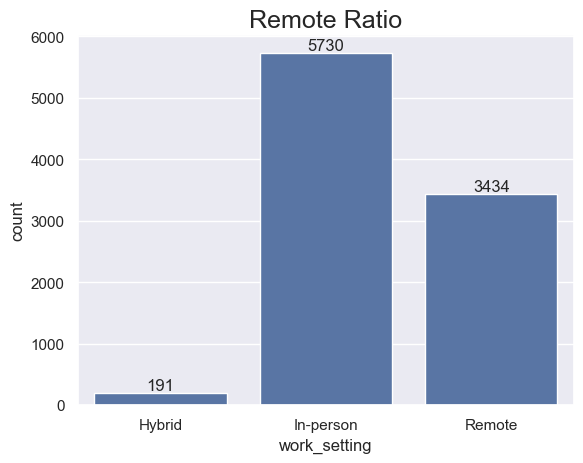

In [27]:
plt.title ('Remote Ratio', fontsize=18)
ax = sns.countplot(x='work_setting', data=ds_salaries)
for i in ax.containers:
    ax.bar_label(i)

In [28]:
work_setting_ratio = ds_salaries.work_setting.value_counts(normalize=True)
display(work_setting_ratio)

work_setting
In-person    0.612507
Remote       0.367076
Hybrid       0.020417
Name: proportion, dtype: float64

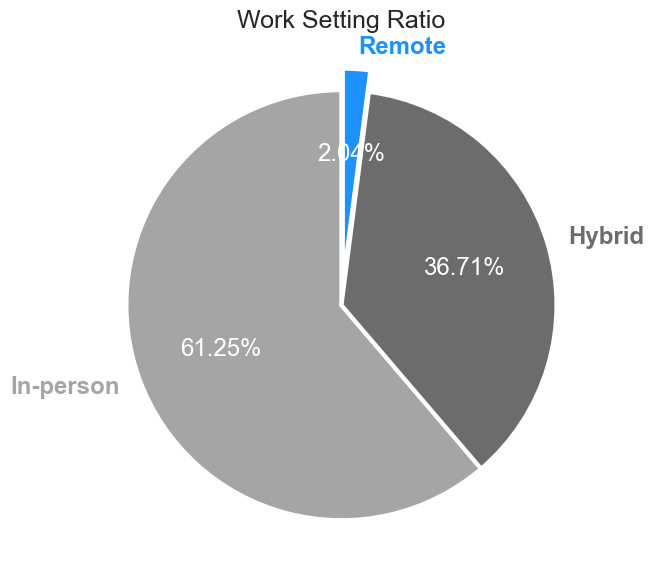

In [29]:
fig, ax = plt.subplots(figsize=(10, 6))

x=work_setting_ratio

cmap = plt.get_cmap('Greys')
colors = list(cmap(np.linspace(0.45,0.85, len(x))))

colors[2]='dodgerblue'
labels = ['In-person','Hybrid','Remote']

patches, texts, pcts = ax.pie(
    x, labels=labels, autopct='%.2f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    startangle=90,
    colors=colors,
    # "Explode" the wedge to highlight it.
    explode=(0, 0, 0.1))

for i, patch in enumerate(patches):
   texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600)
ax.set_title('Work Setting Ratio', fontsize=18)
plt.tight_layout()

## 2. Work Year Analysis

### 2.1 Remote ratio by work year

<Axes: xlabel='work_setting', ylabel='work_year'>

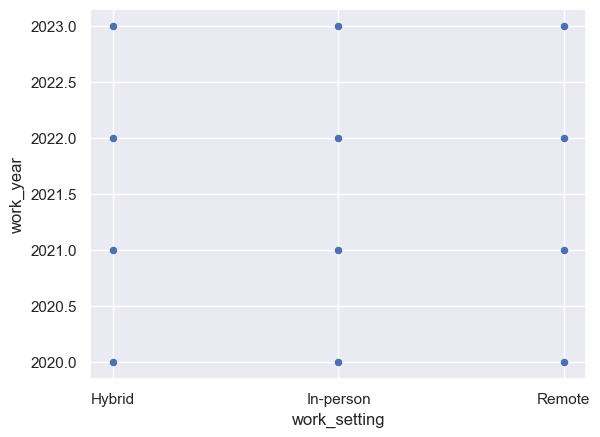

In [30]:
sns.scatterplot(x='work_setting', y='work_year', data=ds_salaries)

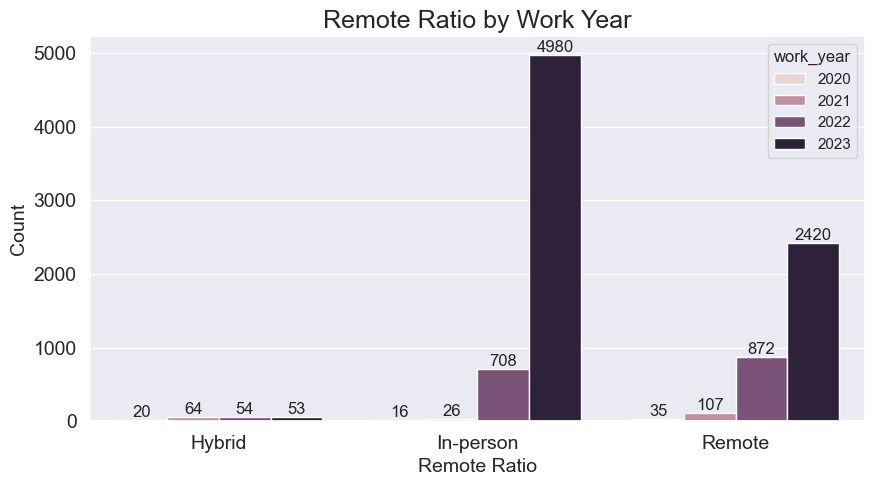

In [31]:
plt.figure(figsize=(10,5))
plt.title("Remote Ratio by Work Year", fontsize=18)
ax = sns.countplot(x='work_setting', data=ds_salaries, hue = 'work_year')
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel("Remote Ratio", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

## 3. Experience Level Analysis

### 3.1. Employment Type by Experience Level

In [32]:
type_level_pivot = pd.crosstab(ds_salaries['employment_type'],ds_salaries['experience_level'])
display(type_level_pivot)

experience_level,Entry-level,Executive,Mid-level,Senior
employment_type,,,,
Contract,4,1,10,4
Freelance,2,0,5,4
Full-time,478,280,1851,6701
Part-time,12,0,3,0


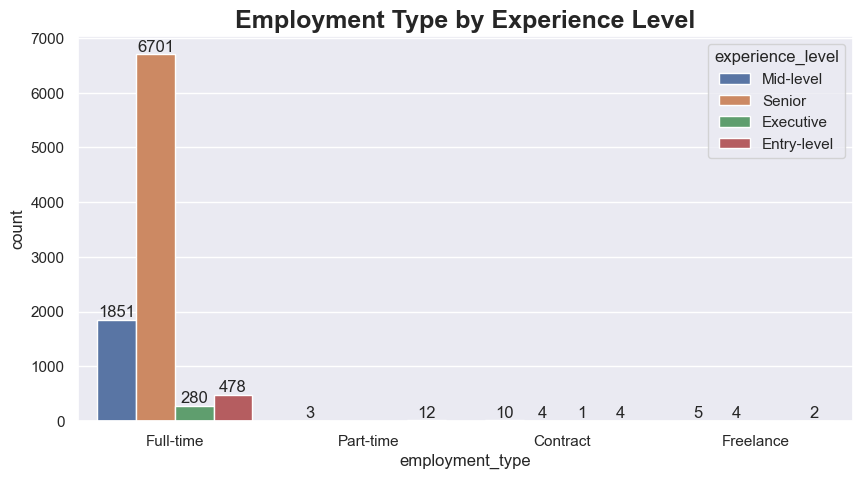

In [33]:
plt.figure(figsize=(10,5))
plt.title('Employment Type by Experience Level', fontsize=18, weight='bold')
ax=sns.countplot(x='employment_type', data=ds_salaries, hue = 'experience_level')
for i in ax.containers:
    ax.bar_label(i)

### 3.2. Top 3 Job Title by Experience Level

In [34]:
top_titles = ds_salaries['job_title'].value_counts()[:3]
top_titles

job_title
Data Engineer     2195
Data Scientist    1989
Data Analyst      1388
Name: count, dtype: int64

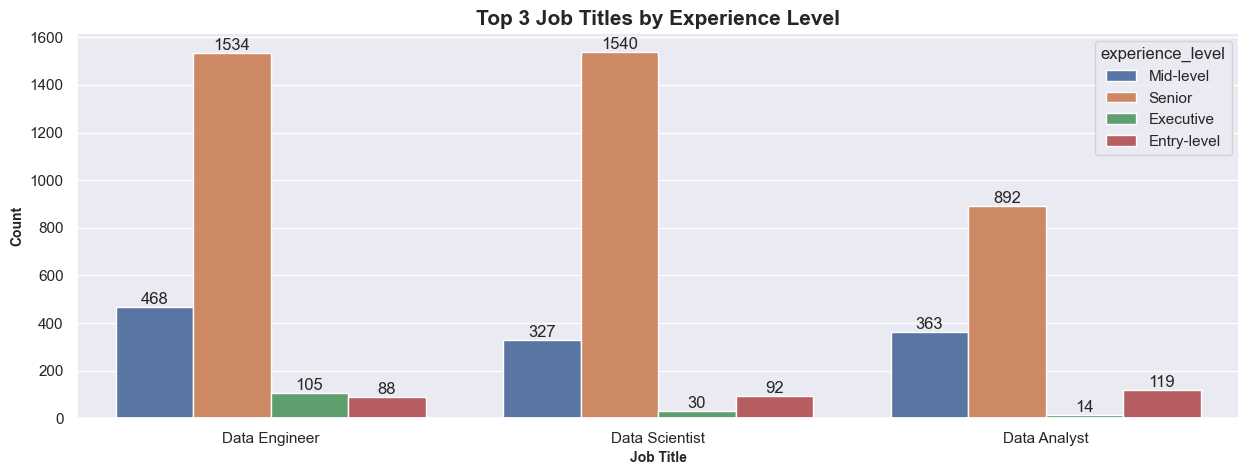

In [35]:
plt.figure(figsize=(15,5))
plt.title('Top 3 Job Titles by Experience Level', fontsize=15, fontweight='bold')
ax=sns.countplot(x='job_title', hue='experience_level', data=ds_salaries, 
              order=ds_salaries['job_title'].value_counts().iloc[:3].index)
for i in ax.containers:
    ax.bar_label(i)
plt.ylabel('Count', fontsize=10, fontweight='bold')
plt.xlabel('Job Title', fontsize=10, fontweight='bold')
plt.show()

### 3.3. Company Size by Experience Level

In [36]:
size_level_pivot = pd.crosstab(ds_salaries['company_size'],ds_salaries['experience_level'])
display(size_level_pivot)

experience_level,Entry-level,Executive,Mid-level,Senior
company_size,,,,
L,105,18,166,459
M,346,256,1644,6202
S,45,7,59,48


<Figure size 1000x500 with 0 Axes>

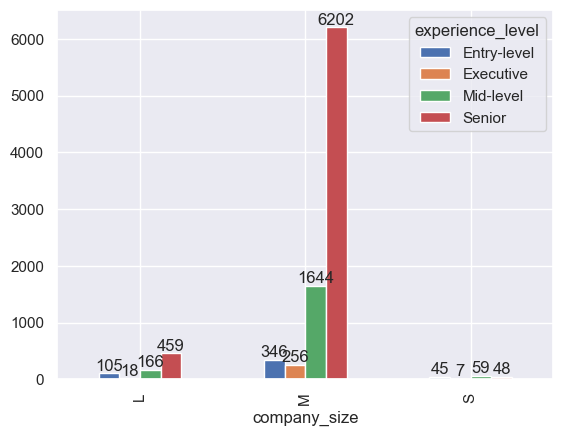

In [37]:
plt.figure(figsize=(10,5))
ax=size_level_pivot.plot.bar()
for i in ax.containers:
    ax.bar_label(i)

***Medium-Sized companies hire more Data professionals in every experience level although there are significantly more Senior-level/Expert employees compared to other levels.***

## 4. Company Location Analysis

### 4.1. Experience Level

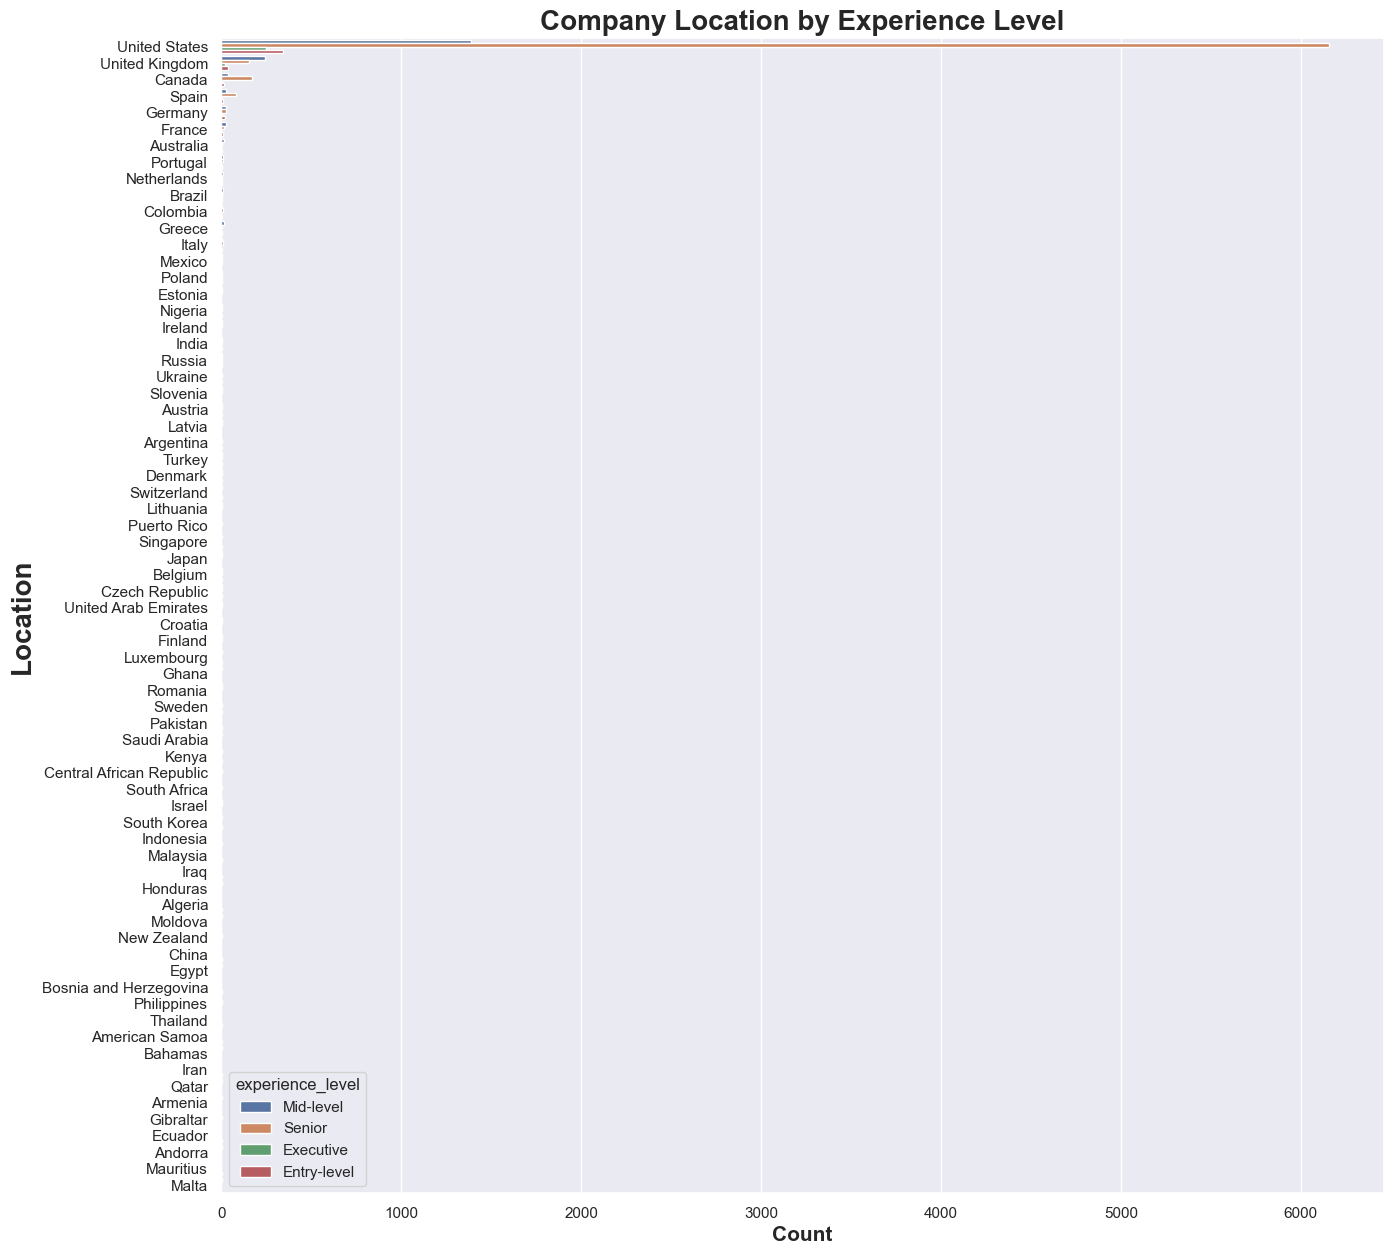

In [38]:
plt.figure(figsize=(15,15))
plt.title('Company Location by Experience Level', fontsize=20, fontweight='bold')
sns.countplot(y='company_location', hue='experience_level', data=ds_salaries, order=ds_salaries['company_location'].value_counts().index)
plt.xlabel('Count', fontsize=15, fontweight='bold')
plt.ylabel('Location', fontsize=20, fontweight='bold')
plt.show()

## 5. Salary Analysis

### 5.1. Salary by work year

<Axes: xlabel='work_year', ylabel='salary_in_usd'>

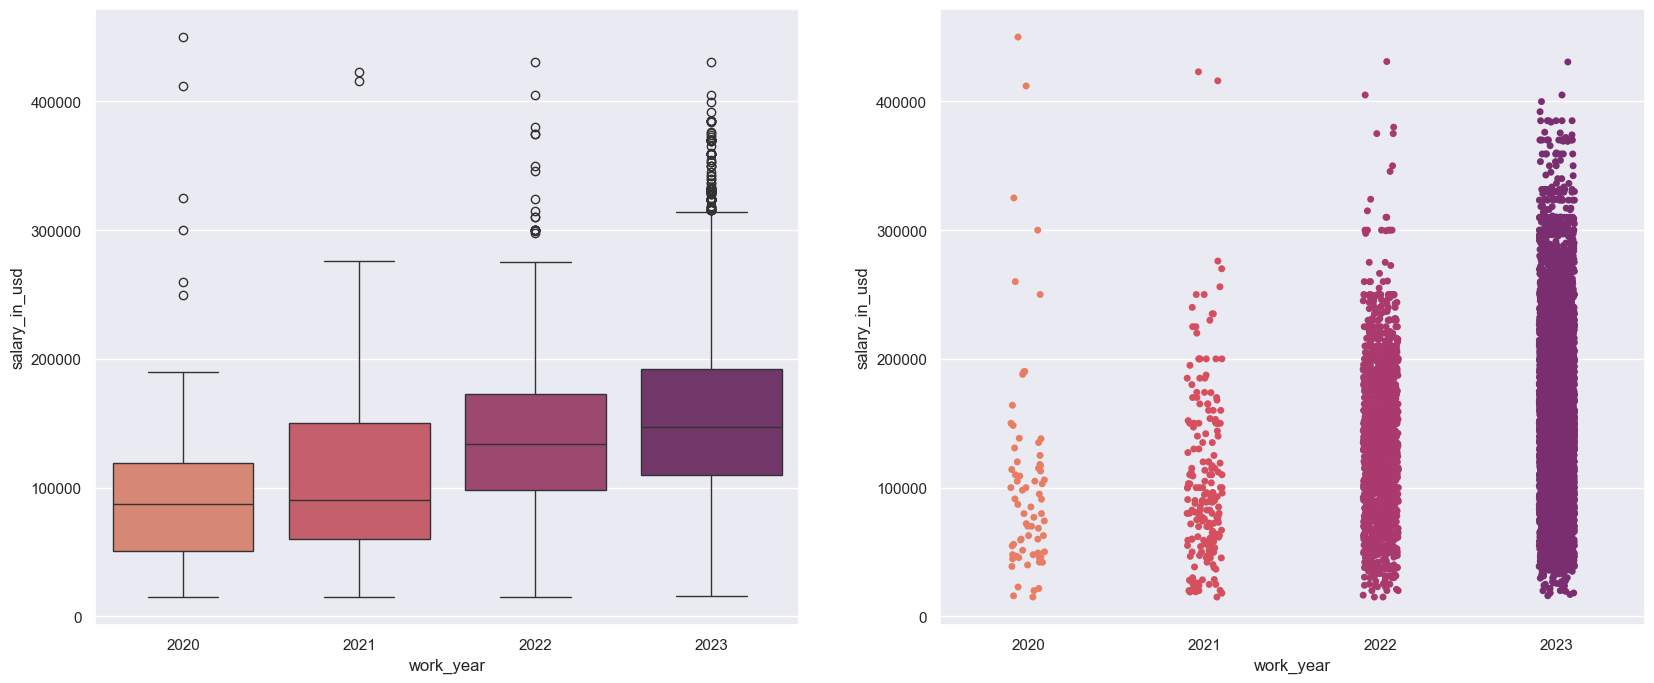

In [39]:
fig,axes=plt.subplots(1,2,figsize=(20,8))

sns.boxplot(ax=axes[0],x='work_year',y='salary_in_usd', data=ds_salaries, palette="flare")
sns.stripplot(ax=axes[1],x='work_year',y='salary_in_usd', data=ds_salaries, palette="flare")

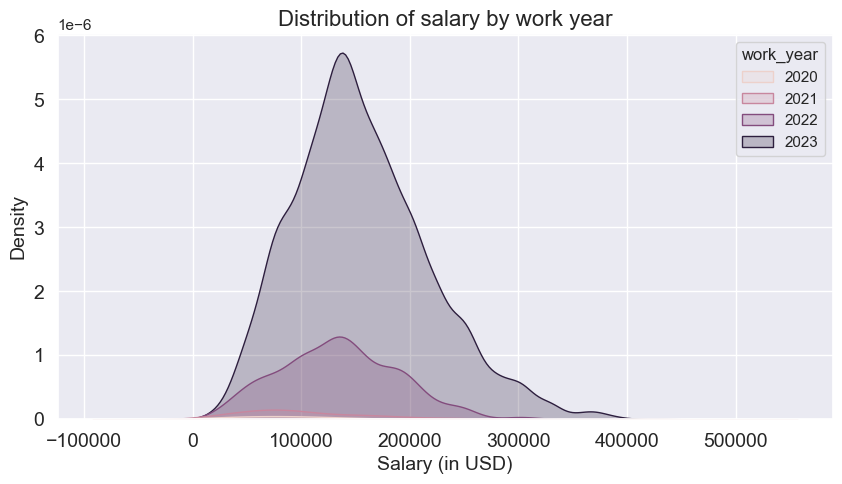

In [40]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=ds_salaries, x='salary_in_usd', hue='work_year', fill=True)
plt.title("Distribution of salary by work year", fontsize=16)
plt.xlabel("Salary (in USD)", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

***The density plot shows an increase in the number of Data Science jobs and salary for each year.***

### 5.2. Salary by Experience Level

<Axes: xlabel='experience_level', ylabel='salary_in_usd'>

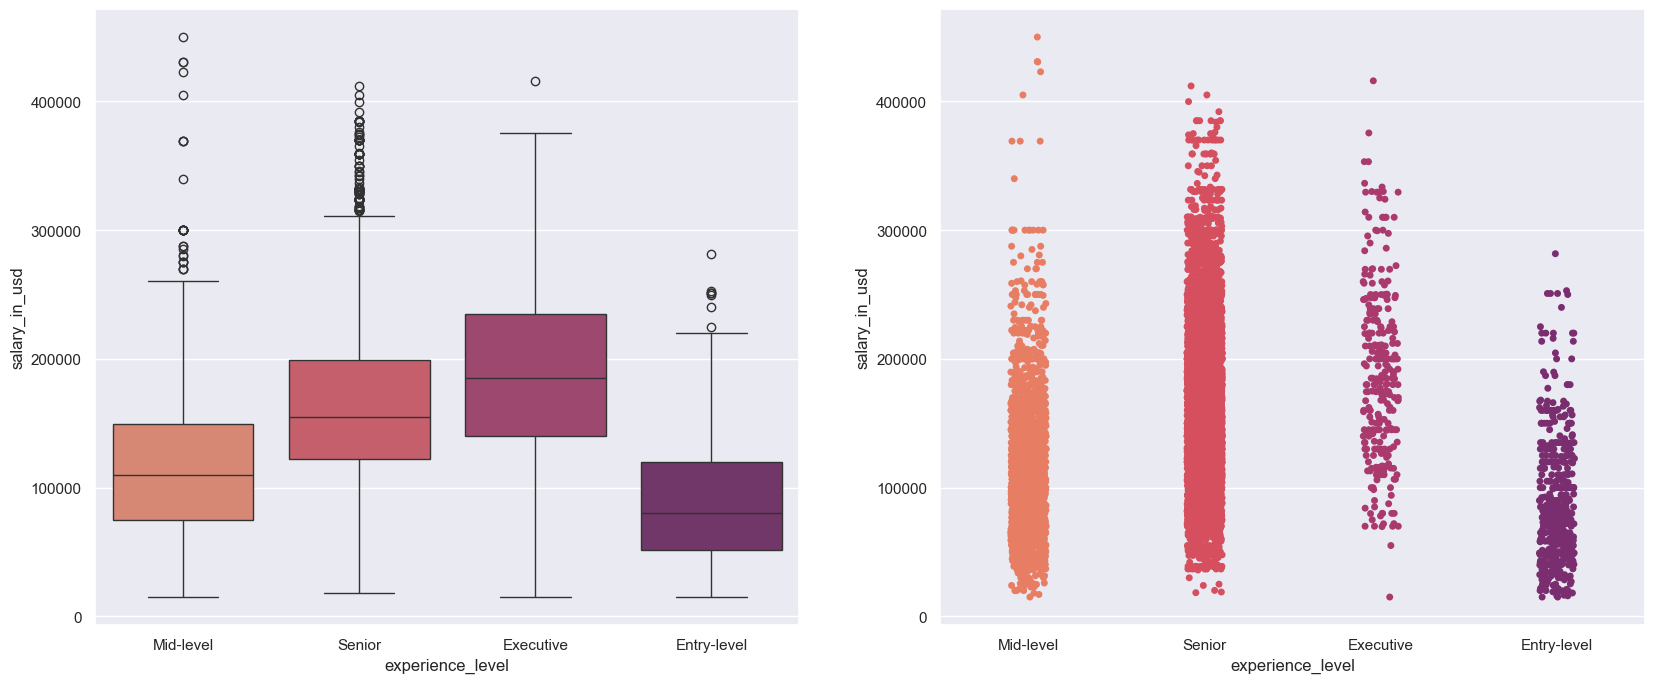

In [41]:
fig,axes=plt.subplots(1,2,figsize=(20,8))

sns.boxplot(ax=axes[0],x='experience_level',y='salary_in_usd', data=ds_salaries, palette="flare")
sns.stripplot(ax=axes[1],x='experience_level',y='salary_in_usd', data=ds_salaries, palette="flare")

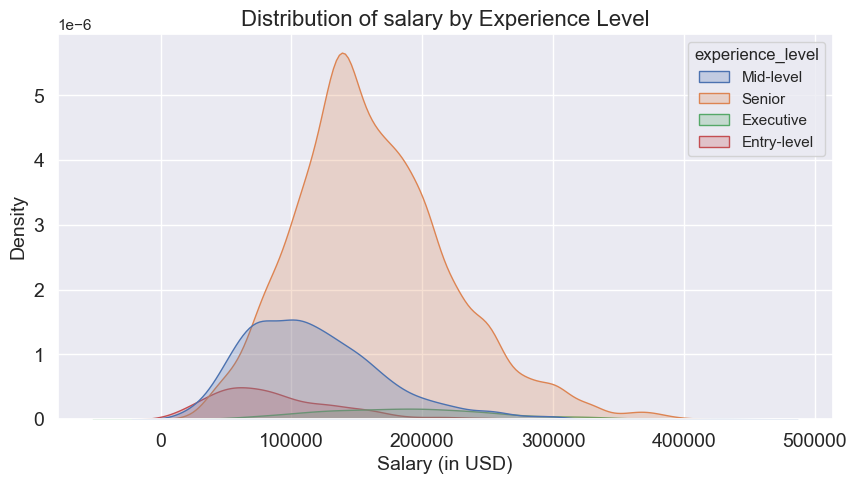

In [42]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=ds_salaries, x='salary_in_usd', hue='experience_level', fill=True)
plt.title("Distribution of salary by Experience Level", fontsize=16)
plt.xlabel("Salary (in USD)", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

***The average salary is higher for a higher experience level. Executive-level/Directors are paid the highest salaries of all the experience levels on average, and Entry-level are the least earners.***

### 5.3. Salary by Company Size

<Axes: xlabel='company_size', ylabel='salary_in_usd'>

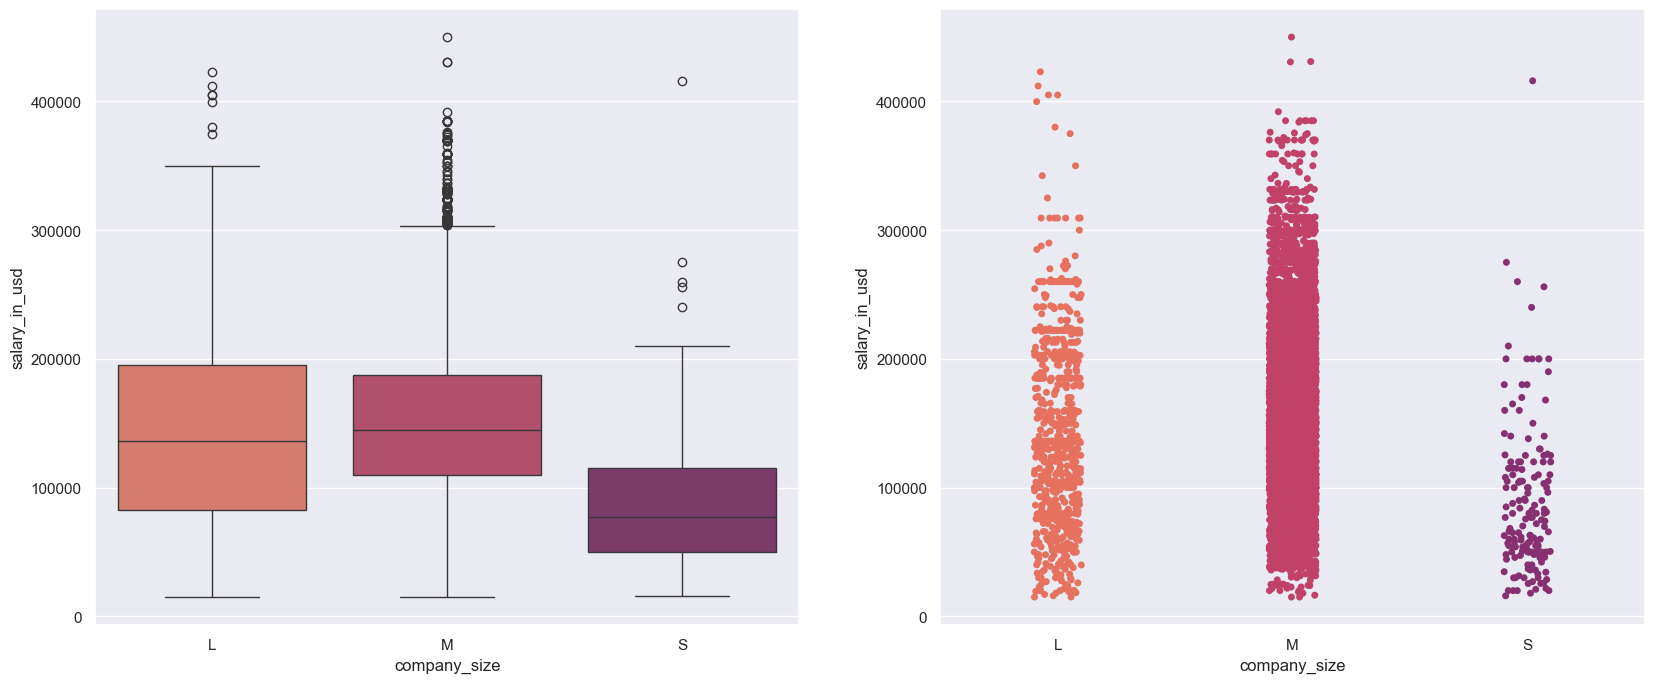

In [43]:
fig,axes=plt.subplots(1,2,figsize=(20,8))

sns.boxplot(ax=axes[0],x='company_size',y='salary_in_usd', data=ds_salaries, palette="flare")
sns.stripplot(ax=axes[1],x='company_size',y='salary_in_usd', data=ds_salaries, palette="flare")

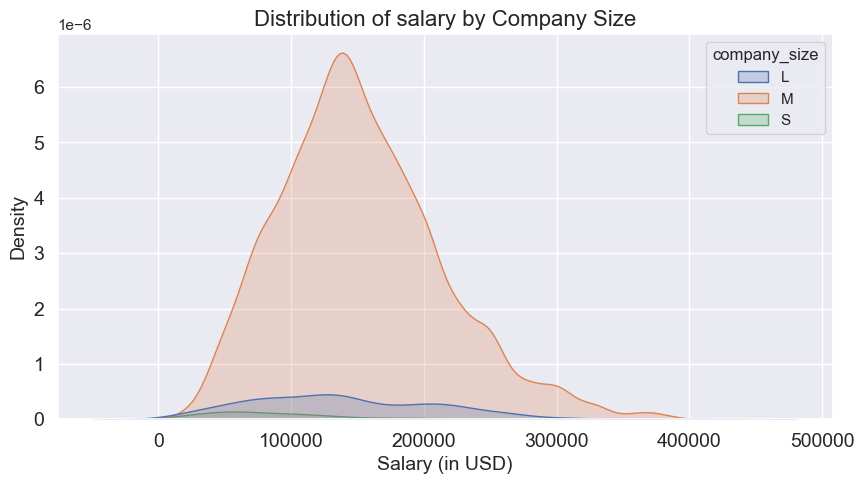

In [44]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=ds_salaries, x='salary_in_usd', hue='company_size', fill=True)
plt.title("Distribution of salary by Company Size", fontsize=16)
plt.xlabel("Salary (in USD)", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

***Medium and Large-sized companies have higher pay in comparison to small sized companies***

### 5.4. Highest salaries by job title

In [45]:
title_sal_pivot = pd.pivot_table(data=ds_salaries,index=['job_title'],values=['salary_in_usd'], aggfunc='max').sort_values(by=['salary_in_usd'],ascending=False)
display(title_sal_pivot)

,salary_in_usd
job_title,
Research Scientist,450000
Data Analyst,430967
Analytics Engineer,430640
Applied Machine Learning Scientist,423000
Principal Data Scientist,416000
...,...
Machine Learning Operations Engineer,60000
Sales Data Analyst,60000
Compliance Data Analyst,60000


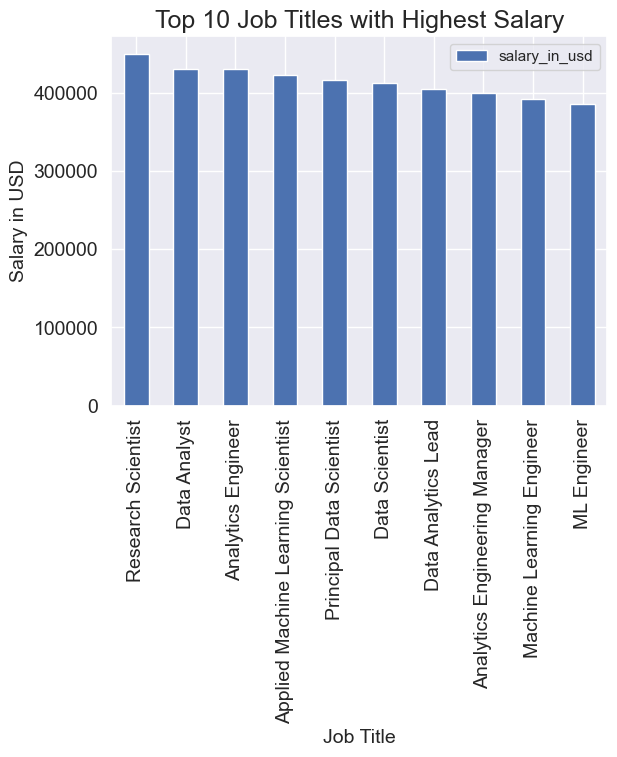

In [46]:
title_sal_pivot.head(10).plot.bar()
plt.title('Top 10 Job Titles with Highest Salary', fontsize=18)
plt.xlabel("Job Title", fontsize=14)
plt.ylabel("Salary in USD", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

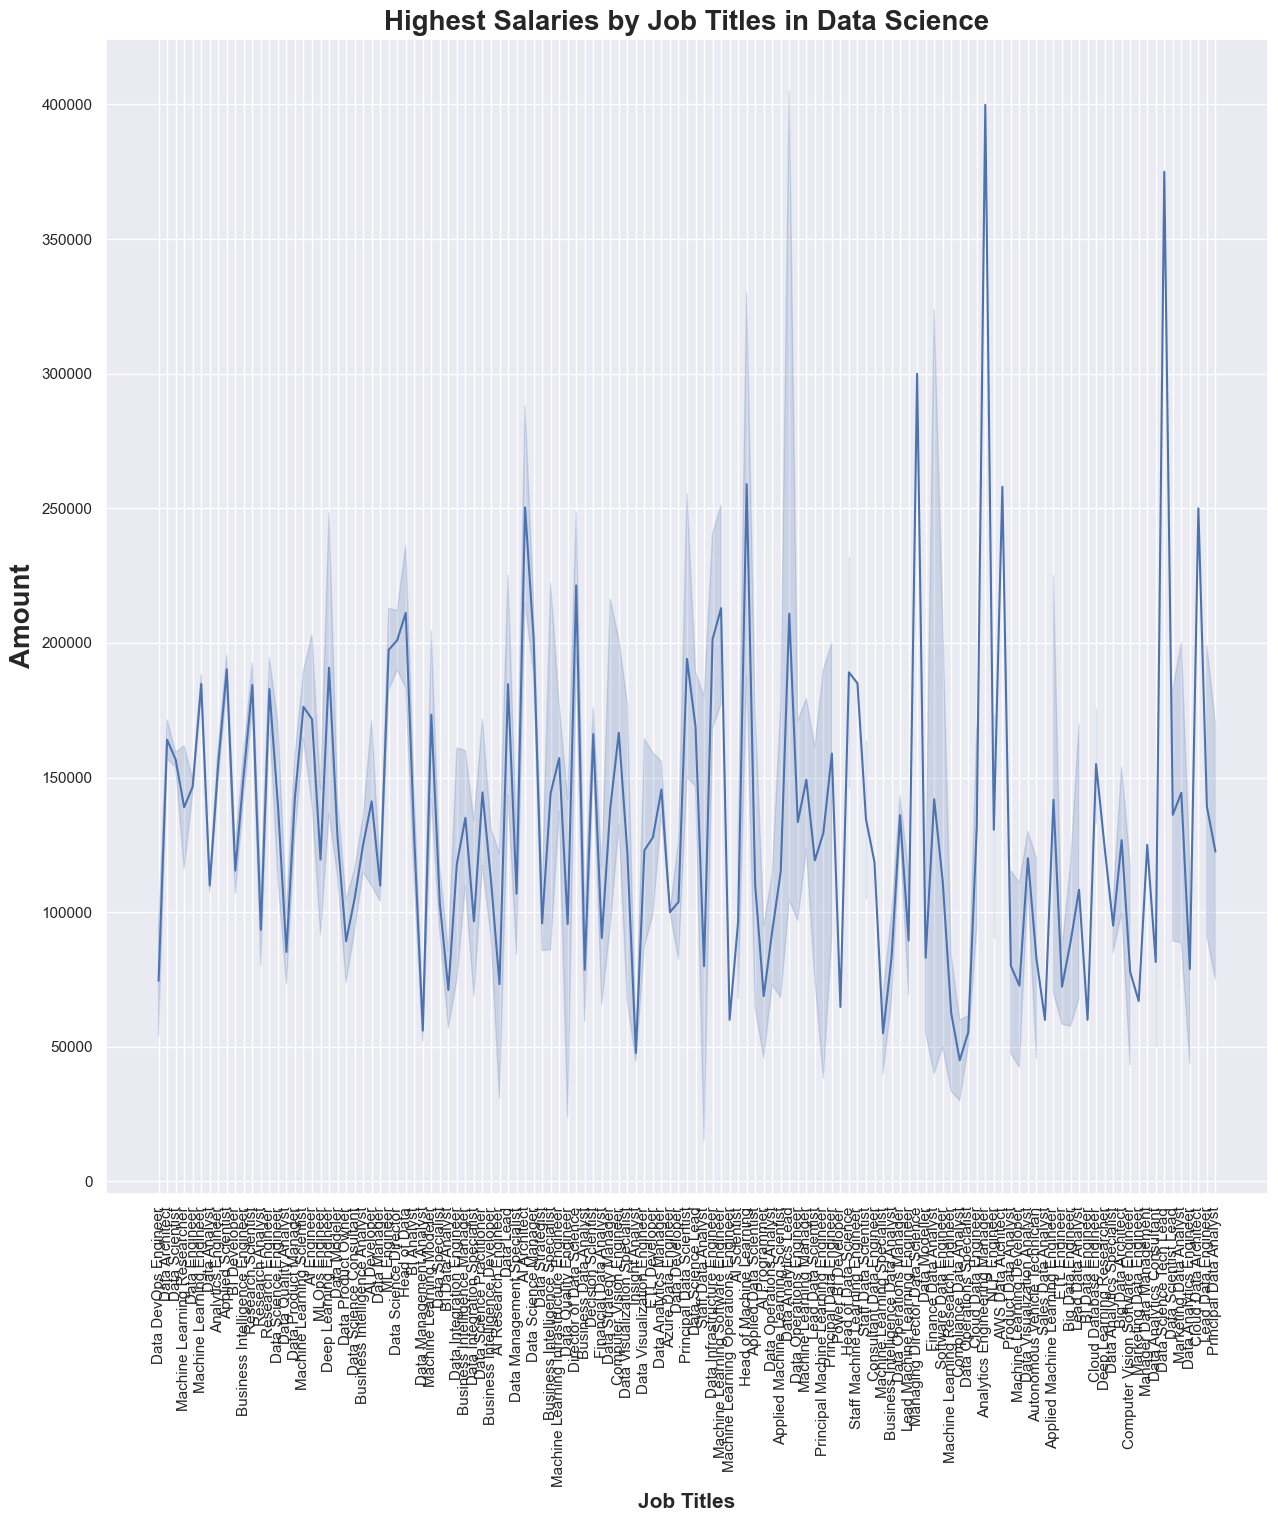

In [47]:
plt.figure(figsize=(15,15))
plt.title('Highest Salaries by Job Titles in Data Science', fontsize=20, fontweight='bold')
sns.lineplot(y='salary_in_usd', x='job_title', data=ds_salaries)
plt.xlabel('Job Titles', fontsize=15, fontweight='bold')
plt.ylabel('Amount', fontsize=20, fontweight='bold')
plt.xticks(rotation=90)
plt.show()

### 5.5. Average Salary by Company Location

In [48]:
loc_sal_pivot = pd.pivot_table(data=ds_salaries,index=['company_location'],values=['salary_in_usd'], aggfunc='mean').sort_values(by=['salary_in_usd'],ascending=False)
display(loc_sal_pivot)

,salary_in_usd
company_location,
Qatar,300000.000000
Puerto Rico,167500.000000
Japan,165500.000000
United States,158158.728234
Canada,143918.836283
...,...
Honduras,20000.000000
Moldova,18000.000000
Ecuador,16000.000000


<Axes: ylabel='company_location'>

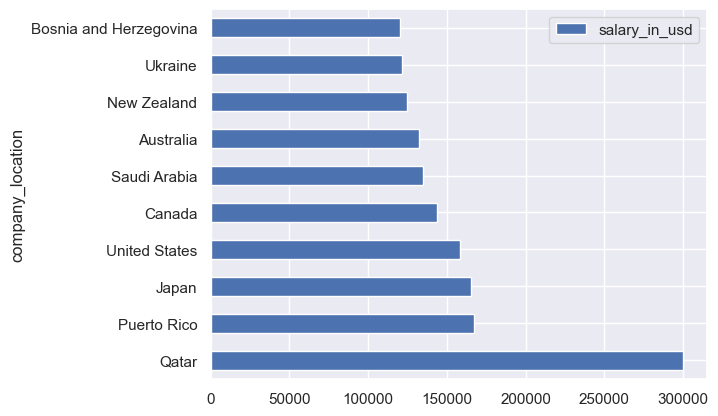

In [49]:
loc_sal_pivot.head(10).plot.barh()

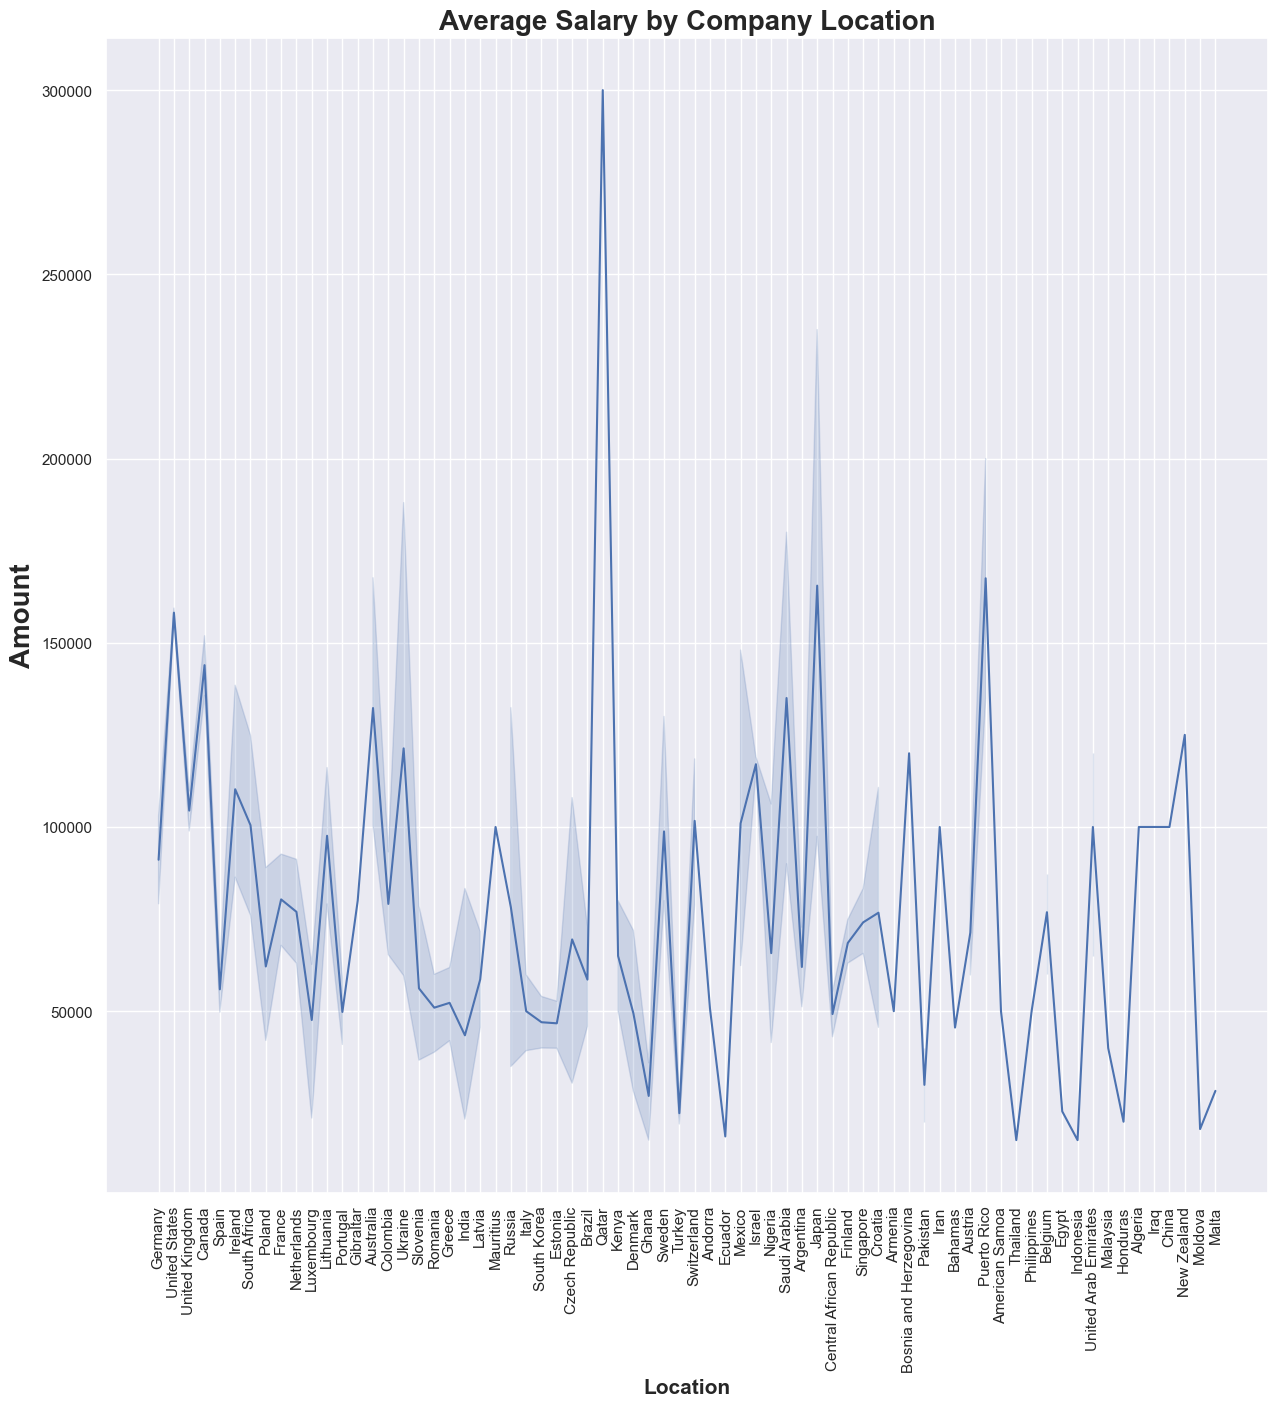

In [50]:
plt.figure(figsize=(15,15))
plt.title('Average Salary by Company Location', fontsize=20, fontweight='bold')
sns.lineplot(y='salary_in_usd', x='company_location', data=ds_salaries)
plt.xlabel('Location', fontsize=15, fontweight='bold')
plt.ylabel('Amount', fontsize=20, fontweight='bold')
plt.xticks(rotation=90)
plt.show()

## Summary

* Most Data Science jobs require Senior-level/Expert experience level and very few positions are available for Executive-level/Directors.
* The most common job titles in the Data Science field are Data Scientist, Data Engineer, Data Analyst and Machine Learning Engineer.
* Most positions are Full-time employment.
* Most Data Science employees and Companies are resident in the United States. However, the location where the highest average salary is paid is Qatar; followed closely by the United States.
* The Number of Data Science jobs and the salary are increasing with each year and experience-level.
* Medium-sized and Large-sized companies pay high salaries in comparison to small-sized companies.
* The average salary for Data Science Jobs in USD is 150,299.49.
* It is important to note that the insights are based on a sample of 9355 participants and may not be representative of the entire population of data science professionals.